# Boeing Distance Measure Report
### Boeing Team

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Abstract
Short summary about the data and what it tells you about your project. 

The data that we have collected was a survey of different teams rating how similar their project is to ours. In this notebook we will see which groups are similar and what groups are not similar to Boeing's team project.

## Data input
In this section include code that reads in the csv file

In [50]:
df = pd.read_csv('2022_Project_distance_Matrix.csv')
df

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
0,7,4,9,8,3,0,6,2,5,1
1,0,1,3,2,4,8,6,5,7,9
2,3,2,1,6,0,8,5,4,7,9
3,8,7,3,9,4,5,0,6,1,2
4,0,2,1,8,7,3,9,6,4,5
5,3,2,0,6,9,7,8,4,1,5
6,3,4,2,9,8,6,0,5,7,1
7,1,2,5,3,0,6,9,7,8,4
8,6,1,0,5,2,9,4,3,7,8
9,3,1,2,6,0,8,9,4,5,7


## Data Cleaning
In this section provide code for converting the raw data into clean and usable data structures (if needed)

## Data Modeling

This section that builds a model.  This doesn't have to be all that advanced. You should probably start with some simple statistical models such as an average distance matrix.

In [22]:
dist_mat = [] # initialize dist matrix

for col1 in df.columns:
    
    row = [] # initialize row in dist matrix
    
    for col2 in df.columns:
        row.append(df[df[col1] == 0][col2].mean()) # compute mean distance between every pair
        
    dist_mat.append(row) # append to dist matrix

## Data Visualization

This section make some graphs visualizing your results.  A distance matrix and/or network graph may be cool.  Think though the best way to show what you learned.

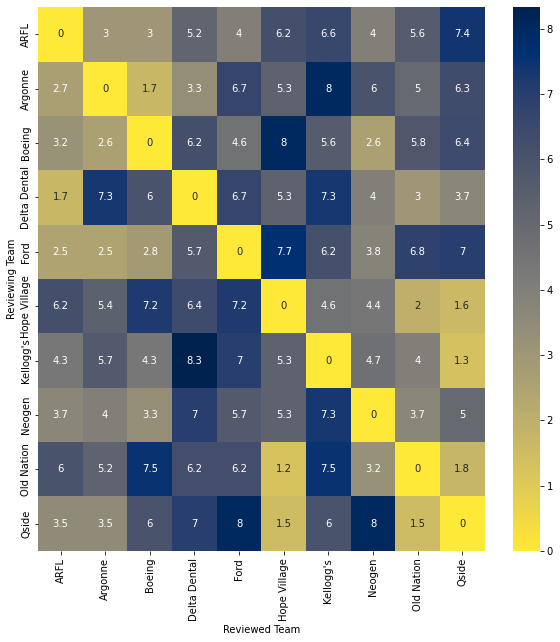

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(dist_mat, xticklabels=df.columns, yticklabels=df.columns, cmap='cividis_r', annot=True)
plt.xlabel('Reviewed Team')
plt.ylabel('Reviewing Team')
plt.show()

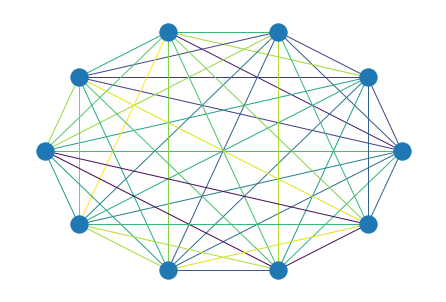

In [48]:
G = nx.from_numpy_matrix(np.array(dist_mat))
pos = nx.circular_layout(G)
nx.draw(G, pos = pos, edge_color = [ i[2]['weight'] for i in G.edges(data=True)])

## Conclusion

This should be similar to the abstract but with more details. What can you conclude about your project from this data?

When looking at the heatmap, we can see which projects are similar to Boeing’s project (by looking at the numbers that are lower in the scale) and which projects are different (by looking at the numbers that are higher in the scale). Argonne and Neogen’s projects were similar to Boeing’s project as they had a value of 2.6, and Qside was different as they had a value of 6.4.

---